Epoch 1/25, Loss: 0.0885, Accuracy: 0.5574
Epoch 2/25, Loss: 0.1144, Accuracy: 0.4281
Epoch 3/25, Loss: 0.1152, Accuracy: 0.4239
Epoch 4/25, Loss: 0.1222, Accuracy: 0.3890
Epoch 5/25, Loss: 0.1033, Accuracy: 0.4833
Epoch 6/25, Loss: 0.1061, Accuracy: 0.4695
Epoch 7/25, Loss: 0.0783, Accuracy: 0.6083
Epoch 8/25, Loss: 0.0626, Accuracy: 0.6867
Epoch 9/25, Loss: 0.0475, Accuracy: 0.7626
Epoch 10/25, Loss: 0.0402, Accuracy: 0.7992
Epoch 11/25, Loss: 0.0388, Accuracy: 0.8059
Epoch 12/25, Loss: 0.0382, Accuracy: 0.8089
Epoch 13/25, Loss: 0.0377, Accuracy: 0.8113
Epoch 14/25, Loss: 0.0375, Accuracy: 0.8125
Epoch 15/25, Loss: 0.0372, Accuracy: 0.8140
Epoch 16/25, Loss: 0.0370, Accuracy: 0.8150
Epoch 17/25, Loss: 0.0369, Accuracy: 0.8155
Epoch 18/25, Loss: 0.0368, Accuracy: 0.8160
Epoch 19/25, Loss: 0.0367, Accuracy: 0.8164
Epoch 20/25, Loss: 0.0367, Accuracy: 0.8167
Epoch 21/25, Loss: 0.0366, Accuracy: 0.8171
Epoch 22/25, Loss: 0.0365, Accuracy: 0.8173
Epoch 23/25, Loss: 0.0365, Accuracy: 0.81

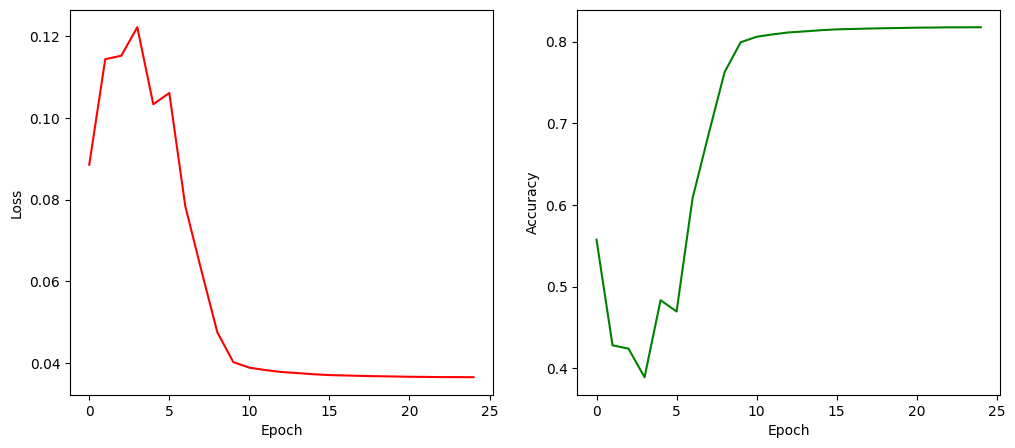

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Подготовка обучающей выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0  # Преобразуем изображения в вектор и нормализуем
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train) # One-hot encoding выходных значений
y_test = to_categorical(y_test)

# Создание и обучение модели персептрона с заданной скоростью обучения
input_size = 28*28  # Количество входов
output_size = 10      # Количество выходов
learning_rate = 0.5
epochs = 25

np.random.seed(42)
weights = np.random.rand(input_size, output_size) * 0.01  # Случайные малые веса
biases = np.random.uniform(-1,1,output_size)  # Смещения инициализируем малыми значениями

# Списки для хранения ошибок и точности на каждой эпохе
losses = []
accuracies = []

# Функция активации softmax
def softmax(x):
  exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def predict(inputs):
    activation = np.dot(inputs, weights) + biases # Вычисление активации
    return softmax(activation)

# Обучение методом положительного и отрицательного подкрепления
def train(training_data, training_labels):
    for _ in range(epochs):
      predictions = predict(training_data)

      # Обновляем веса
      for i in range(training_data.shape[0]):
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(training_labels[i])

        if predicted_class == true_class:
            # Положительное подкрепление: увеличиваем веса для правильного класса
            weights[:, predicted_class] += training_data[i] * learning_rate  # Увеличиваем вес
            biases[predicted_class] += learning_rate
        else:
            # Отрицательное подкрепление: уменьшаем веса для неправильного класса
            weights[:, predicted_class] -= training_data[i] * learning_rate  # Уменьшаем вес
            biases[predicted_class] -= learning_rate
            weights[:, true_class] += training_data[i] * learning_rate  # Увеличиваем вес для правильного класса
            biases[true_class] += learning_rate

      # Вычисление потерь и точности
      predictions = predict(training_data)
      loss = np.mean(np.square(predictions - training_labels))  # Среднеквадратичная ошибка
      accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(training_labels, axis=1))

      losses.append(loss)
      accuracies.append(accuracy)
      print(f"Epoch {_+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


# Обучение модели
train(x_train, y_train)

# Тестирование модели
predictions = predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
accuracy_test = np.mean(predicted_classes == true_classes)
print(f"Точность на тестовых данных: {accuracy_test * 100:.2f}%")

# Графики ошибки и точности
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, color = "red")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies, color = "green")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()